In [95]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [ ]:

folder_path = "../data/processed"
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))


lst_df = []
for file in csv_files:
    df = pd.read_csv(file)
    lst_df.append(df)
df = pd.concat(lst_df)
df = df.reset_index(drop=True)

['../data/processed\\2025_11_12_cleaned.csv',
 '../data/processed\\2025_11_13_cleaned.csv',
 '../data/processed\\2025_11_14_cleaned.csv',
 '../data/processed\\2025_11_15_cleaned.csv',
 '../data/processed\\2025_11_16_cleaned.csv',
 '../data/processed\\2025_11_17_cleaned.csv',
 '../data/processed\\2025_11_18_cleaned.csv',
 '../data/processed\\2025_11_19_cleaned.csv',
 '../data/processed\\2025_11_20_cleaned.csv',
 '../data/processed\\2025_11_21_cleaned.csv']

In [98]:
df.sample(200, random_state=42)

,company_name,departure_time,pickup_point,arrival_time,dropoff_point,price_original,price_discounted,departure_date,start_point,destination,...,rating_info_accuracy,rating_info_completeness,rating_staff_attitude,rating_comfort,rating_service_quality,rating_punctuality,rating_overall,reviewer_count,number_of_seat,duration_minutes
12377,Rin Hà Travel Car,13:30:00,Other,16:00,Other,150000,118000,2025-11-17,Đà Nẵng,Thừa Thiên-Huế,...,4.7,4.8,4.8,4.7,4.7,4.7,4.7,200,7,150
20838,Đăng Nhân,20:00:00,Văn phòng,03:15,Other,350000,0,2025-11-21,Sài Gòn,Ninh Thuận,...,3.7,3.9,4.3,4.0,3.7,3.5,4.0,331,24,435
15593,Liên Hưng,08:45:00,Văn phòng,17:00,Văn phòng,330000,230000,2025-11-19,Sài Gòn,Ninh Thuận,...,4.2,4.3,4.1,4.0,3.9,4.3,4.0,13084,32,495
14840,Hà Thảo,07:30:00,Văn phòng,11:00,Other,300000,270000,2025-11-18,Đà Nẵng,Quảng Ngãi,...,4.9,4.9,4.9,4.9,4.9,5.0,4.9,169,7,210
17896,Hà Linh NT,17:00:00,Bến xe,02:15,Văn phòng,370000,350000,2025-11-19,Đà Nẵng,Nha Trang - Khánh Hòa,...,4.0,4.1,4.1,3.8,3.9,4.6,4.0,114,34,555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,Tân Quang Dũng,18:46:00,Văn phòng,02:51,Bến xe,600000,0,2025-11-13,Đà Nẵng,Nha Trang - Khánh Hòa,...,3.9,4.0,4.0,3.9,3.8,4.3,3.8,2382,22,485
8665,G8 SAPA OPEN TOUR,07:15:00,Văn phòng,12:10,Văn phòng,420000,0,2025-11-16,Hà Nội,Sa Pa - Lào Cai,...,4.6,4.6,4.6,4.6,4.6,4.6,4.6,2047,24,295
3634,Tuấn Trung,19:00:00,Bến xe,02:45,Bến xe,450000,0,2025-11-14,Sài Gòn,Đắk Lắk,...,4.0,4.2,4.1,4.0,4.0,4.6,4.6,1073,22,465
20208,Rin Hà Travel Car,16:30:00,Other,19:00,Other,150000,118000,2025-11-20,Đà Nẵng,Thừa Thiên-Huế,...,4.7,4.8,4.8,4.7,4.7,4.7,4.6,201,7,150


In [99]:
print(f"Size dataset: {df.shape}\n")
df.info()

Size dataset: (23206, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23206 entries, 0 to 23205
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   company_name              23206 non-null  object 
 1   departure_time            23206 non-null  object 
 2   pickup_point              23206 non-null  object 
 3   arrival_time              23206 non-null  object 
 4   dropoff_point             23206 non-null  object 
 5   price_original            23206 non-null  int64  
 6   price_discounted          23206 non-null  int64  
 7   departure_date            23206 non-null  object 
 8   start_point               23206 non-null  object 
 9   destination               23206 non-null  object 
 10  rating_safety             23206 non-null  float64
 11  rating_info_accuracy      23206 non-null  float64
 12  rating_info_completeness  23206 non-null  float64
 13  rating_staff_attitude     23206 no

In [100]:
df.describe()

,price_original,price_discounted,rating_safety,rating_info_accuracy,rating_info_completeness,rating_staff_attitude,rating_comfort,rating_service_quality,rating_punctuality,rating_overall,reviewer_count,number_of_seat,duration_minutes
count,2.320600e+04,23206.000000,23206.000000,23206.000000,23206.000000,23206.000000,23206.000000,23206.000000,23206.000000,23206.000000,23206.000000,23206.000000,23206.000000
mean,3.332912e+05,132604.716582,4.584056,4.450086,4.510101,4.485125,4.435719,4.401935,4.612234,4.425170,2072.196458,22.449022,371.131518
std,1.586138e+05,172687.445566,0.362669,0.471081,0.424047,0.430549,0.465403,0.478436,0.467783,0.492151,3551.365467,13.489532,251.719575
min,0.000000e+00,0.000000,2.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,30.000000
25%,2.200000e+05,0.000000,4.500000,4.200000,4.300000,4.300000,4.200000,4.200000,4.500000,4.200000,107.000000,11.000000,150.000000
50%,3.000000e+05,0.000000,4.700000,4.600000,4.600000,4.600000,4.600000,4.500000,4.700000,4.600000,485.000000,24.000000,330.000000
75%,4.100000e+05,270000.000000,4.800000,4.800000,4.800000,4.800000,4.700000,4.700000,4.800000,4.800000,2367.000000,34.000000,525.000000
max,1.200000e+06,900000.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,17414.000000,241.000000,1500.000000


---

In [101]:
print(f"\tMissing data\n{df.isna().any()}")
print('---'*12)
print(f"Total duplicated: {df.duplicated().sum()}")

	Missing data
company_name                False
departure_time              False
pickup_point                False
arrival_time                False
dropoff_point               False
price_original              False
price_discounted            False
departure_date              False
start_point                 False
destination                 False
rating_safety               False
rating_info_accuracy        False
rating_info_completeness    False
rating_staff_attitude       False
rating_comfort              False
rating_service_quality      False
rating_punctuality          False
rating_overall              False
reviewer_count              False
number_of_seat              False
duration_minutes            False
dtype: bool
------------------------------------
Total duplicated: 0


In [102]:
df.loc[df['price_discounted'] == 0, 'price_discounted'] = df['price_original']

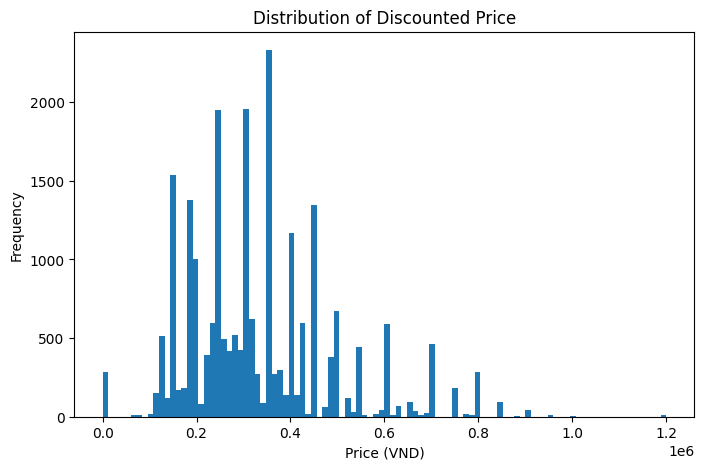

In [103]:
plt.figure(figsize=(8,5))
plt.hist(df['price_original'], bins=100)
plt.title("Distribution of Discounted Price")
plt.xlabel("Price (VND)")
plt.ylabel("Frequency")
plt.show()

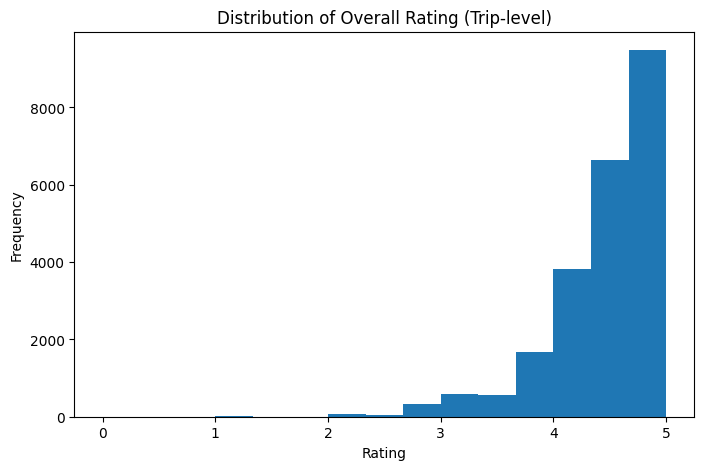

In [104]:
plt.figure(figsize=(8,5))
plt.hist(df['rating_overall'], bins=15)
plt.title("Distribution of Overall Rating (Trip-level)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


In [105]:
import numpy as np

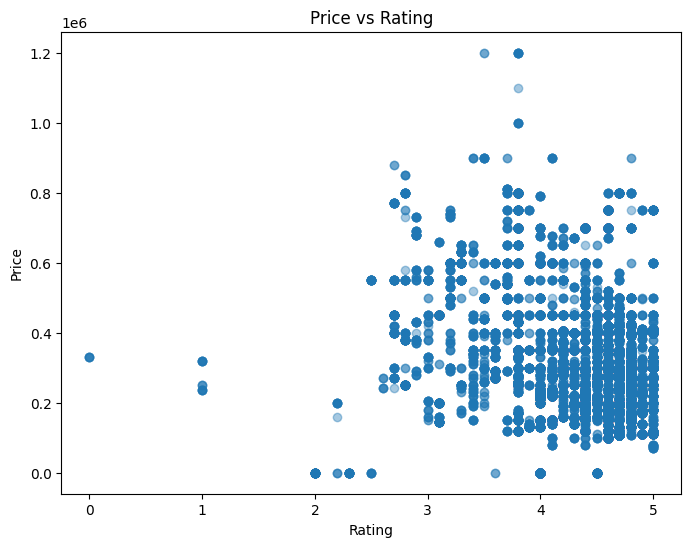

In [106]:
plt.figure(figsize=(8,6))
plt.scatter(df['rating_overall'], df['price_discounted'], alpha=0.4)
plt.title("Price vs Rating")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.show()


In [107]:
df[['rating_overall', 'price_discounted']].corr()


,rating_overall,price_discounted
rating_overall,1.000000,-0.244315
price_discounted,-0.244315,1.000000


In [108]:
df[['price_discounted', 'rating_overall']].skew()


price_discounted    1.152033
rating_overall     -1.830181
dtype: float64

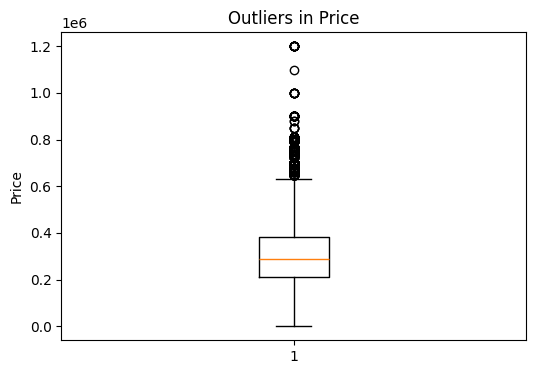

In [109]:
plt.figure(figsize=(6,4))
plt.boxplot(df['price_discounted'])
plt.title("Outliers in Price")
plt.ylabel("Price")
plt.show()
